 ## Heart Failure Analysis 

In [2]:
import pandas as pd

## Load Dataset

In [217]:
df_csv.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
 df_csv = pd.read_csv('data/HF_data.csv', encoding='EUC-KR')
df_csv.head()

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

## 행열 수 & NA값 존재 확인 & label 분포확인

In [44]:
# 행열 수 & NA값 존재 확인
print("Data Shape : ",df_csv.shape)
print(df_csv.info())
print("NA numbers :",df_csv.isnull().sum().sum())

# label 분퐈 확인
print("columns names : ",df_csv.columns)
print(df_csv['DEATH_EVENT'].value_counts())

Data Shape :  (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30

## 기술통계량 확인

In [25]:
df_csv.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 변수 간 상관관계 확인 및 결과 시각화

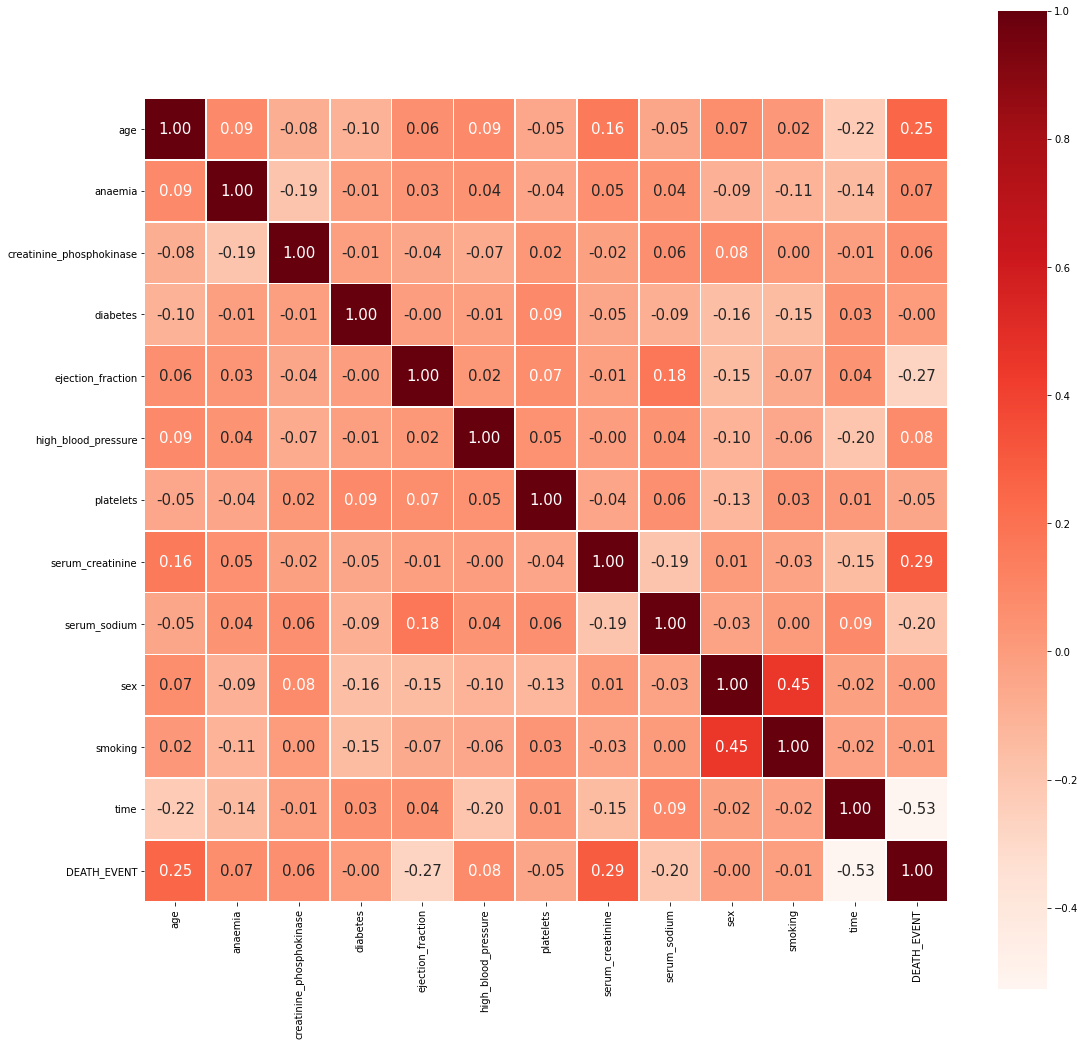

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr = df_csv.corr()
plt.figure(figsize=(18,18))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 15}, fmt = '.2f', square = True, cmap = 'Reds',linewidths=.5)

## 전처리 - 자료분할

In [121]:
#age, anaemia, creatinine_phosphokinase, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, time
# f = df_csv.iloc[:,[0,1,2,4,5,6,7,8,11]]

In [185]:
# 자료분할
from sklearn.model_selection import train_test_split

features = df_csv.loc[:, df_csv.columns!="DEATH_EVENT"].to_numpy()
# features = f.to_numpy()
target = df_csv["DEATH_EVENT"]

train_input, test_input, train_target, test_target = train_test_split(
    features, target, random_state=16)

print("train_input.shape : ",train_input.shape)
print("test_input.shape : ",test_input.shape)

train_input.shape :  (224, 12)
test_input.shape :  (75, 12)


## 변수의 표준화

In [186]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

#Compute the mean and std to be used for later scaling.
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀모형 (Logistic Regression)

In [187]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
lr = LogisticRegression(max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(max_iter=1000)

In [188]:
print(lr.predict(train_scaled[:10]))
print(train_target[:10])

[0 0 0 1 0 1 1 1 0 1]
202    0
213    1
135    0
25     1
232    0
40     1
61     1
17     1
159    0
39     1
Name: DEATH_EVENT, dtype: int64


In [189]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8303571428571429
0.8266666666666667


In [190]:
print(lr.coef_, lr.intercept_)

[[ 5.80377071e-01  1.39745611e-03  2.52712954e-01  1.10416486e-01
  -9.19345024e-01  8.21773635e-02 -2.78989839e-01  7.07372898e-01
  -1.57719082e-01 -1.30079094e-01 -1.40597320e-02 -1.41479619e+00]] [-1.19625684]


## 교차검증

In [218]:
# Evaluate metric(s) by cross-validation and also record fit/score times.
from sklearn.model_selection import cross_validate
# None, to use the default 5-fold cross validation,
scores = cross_validate(lr, train_input, train_target, cv = 5)
print(scores['test_score'])
print(scores['test_score'].mean())

[0.75555556 0.8        0.77777778 0.84444444 0.84090909]
0.8037373737373738


## 결정트리모형

In [210]:
from sklearn.tree import DecisionTreeClassifier

# random_state: Controls the randomness of the estimator. The features are always randomly permuted at each split
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

# Accuracy
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# print(test_target)

1.0
0.8


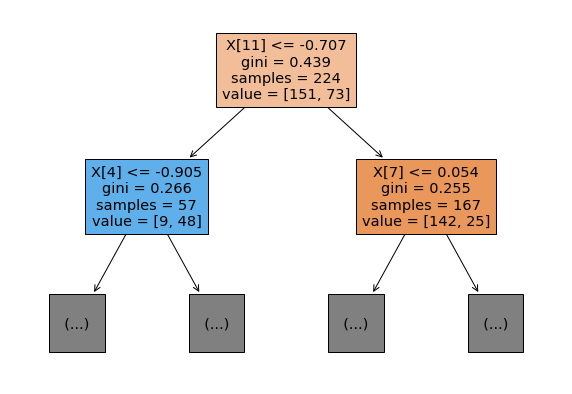

In [211]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True)
# plot_tree(dt, max_depth=1, filled=True)

plt.show()

In [215]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.875
0.8933333333333333


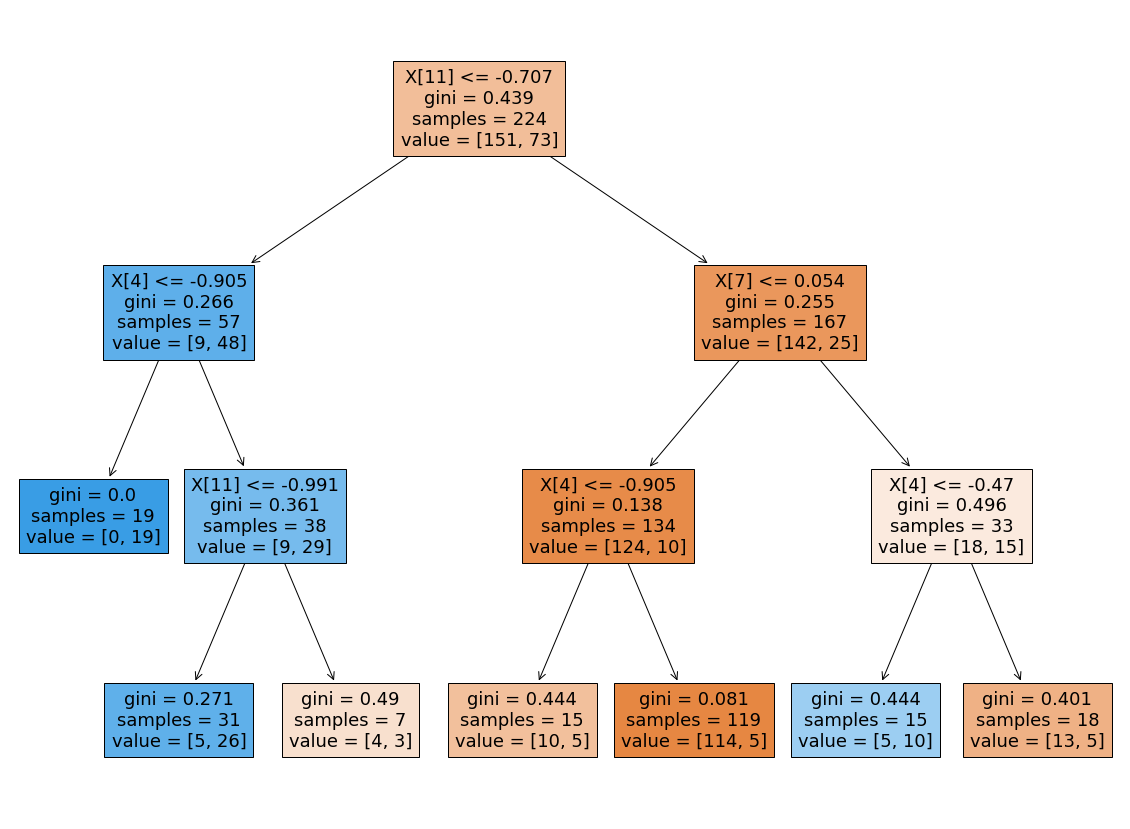

In [216]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True)
plt.show()

In [219]:
df_csv.columns[[4,7,11]]

Index(['ejection_fraction', 'serum_creatinine', 'time'], dtype='object')

## KNN 

In [198]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print("KNN train acc: ", kn.score(train_scaled,train_target))
print("KNN test acc: ", kn.score(test_scaled,test_target))

KNN train acc:  0.7991071428571429
KNN test acc:  0.7333333333333333
